<a href="https://colab.research.google.com/github/Aparna0112/NLP-Project/blob/main/Twitter_validation_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT : TWITTER VALIDATION**

**INTRODUCTION** :

This is an entity-level sentiment analysis  dataset of twitter. Given a message , the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.

**Import required libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings('ignore')

**Load the dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/twitter_validation.csv', names=['ID','loaction','Target','Text'])
df


,ID,loaction,Target,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Target').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Check missing value**

In [ ]:
df.isna().sum()

ID          0
loaction    0
Target      0
Text        0
dtype: int64

In [ ]:
df.dtypes

ID           int64
loaction    object
Target      object
Text        object
dtype: object

**Drop columns**

In [ ]:
df.drop(['ID','loaction'],inplace=True,axis=1)
df

,Target,Text
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
...,...,...
995,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df['Target'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: Target, dtype: int64

**Exploratory Data Analysis**

<Axes: xlabel='Target', ylabel='count'>

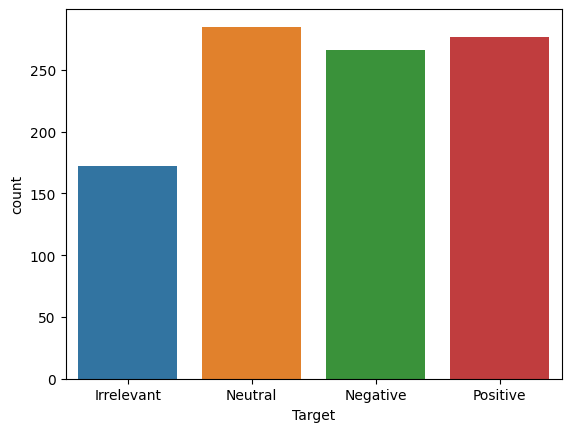

In [ ]:
sns.countplot(x='Target',data=df,hue='Target')

In [ ]:
df1=df.loc[df['Target']!='Irrelevant']
df1

,Target,Text
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
5,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
993,Negative,Please explain how this is possible! How can t...
994,Positive,Good on Sony. As much as I want to see the new...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df1.reset_index(drop=True,inplace=True)
df1

,Target,Text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so it’s time to drink wine n play...
826,Positive,Bought a fraction of Microsoft today. Small wins.


**Convert to numeric values**

In [ ]:
df1['Target']=df1["Target"].map({'Positive':1,'Negative':-1,'Neutral':0})
df1

,Target,Text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so it’s time to drink wine n play...
826,1,Bought a fraction of Microsoft today. Small wins.


In [ ]:
tweets=df1.Text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so it’s time to drink wine n play...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: Text, Length: 828, dtype: object

**Remove Special characters**

In [ ]:
tweets=tweets.str.replace("[^a-zA-Z0-9 ]+","")
tweets

0      BBC News  Amazon boss Jeff Bezos rejects claim...
1      Microsoft Why do I pay for WORD when it functi...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp Ive had Madeleine McCann in my cella...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so its time to drink wine n play ...
826      Bought a fraction of Microsoft today Small wins
827    Johnson  Johnson to stop selling talc baby pow...
Name: Text, Length: 828, dtype: object

**Peform Stemming**

In [ ]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
from nltk import TweetTokenizer
tk=TweetTokenizer()

In [ ]:
tweets=tweets.apply(lambda line:[stemmer.stem(token.lower())for token in tk.tokenize(line)]).apply(lambda token:" ".join(token))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi do i pay for word when it functi...
2      csgo matchmak is so full of closet hack it a t...
3      now the presid is slap american in the face th...
4      hi eahelp ive had madelein mccann in my cellar...
                             ...                        
823    pleas explain how this is possibl how can they...
824    good on soni as much as i want to see the new ...
825    today suck so it time to drink wine n play bor...
826       bought a fraction of microsoft today small win
827    johnson johnson to stop sell talc babi powder ...
Name: Text, Length: 828, dtype: object

**Remove stopwords**

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
sw=stopwords.words('english')
sw

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
tweets=tweets.apply(lambda line:[token for token in tk.tokenize(line)if token not in sw]).apply(lambda token:" ".join(token))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      hi eahelp ive madelein mccann cellar past 13 y...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine n play borderland s...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder us ...
Name: Text, Length: 828, dtype: object

**vectorisation**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
vect=vectorizer.fit_transform(tweets)
print(vect)

  (0, 693)	0.30444931436471556
  (0, 1146)	0.30444931436471556
  (0, 1277)	0.28688245905967213
  (0, 2195)	0.15709177095900126
  (0, 447)	0.2647508387565712
  (0, 1010)	0.20257552033302081
  (0, 949)	0.2647508387565712
  (0, 3054)	0.30444931436471556
  (0, 724)	0.30444931436471556
  (0, 2049)	0.28688245905967213
  (0, 782)	0.27441857686720666
  (0, 520)	0.18299317622979333
  (0, 2479)	0.23928486625711995
  (0, 692)	0.30444931436471556
  (1, 941)	0.4052090854499021
  (1, 3175)	0.4052090854499021
  (1, 2852)	0.3818283483730563
  (1, 1554)	0.4052090854499021
  (1, 4002)	0.36523945141691455
  (1, 2649)	0.31240246924634235
  (1, 3956)	0.26191944627409375
  (1, 2351)	0.24905209813650908
  (2, 1573)	0.17373491154744566
  (2, 642)	0.3681272347249391
  (2, 3736)	0.3681272347249391
  :	:
  (825, 3686)	0.25417047047308006
  (825, 780)	0.22986146346935857
  (825, 1142)	0.2316657281585646
  (825, 3675)	0.21728068459333452
  (825, 3519)	0.288330390748388
  (825, 2821)	0.17198718719403353
  (826, 152

In [ ]:
vect.shape

(828, 4096)

In [ ]:
# import numpy as np
# X=vect.toarray()
# X

In [ ]:
y=df1['Target']
y

0      0
1     -1
2     -1
3      0
4     -1
      ..
823   -1
824    1
825    1
826    1
827    0
Name: Target, Length: 828, dtype: int64

**Separate data for training and testing**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(vect,y,test_size=0.3,random_state=1)

**Model creation : SVC**

In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)

SVC()

In [ ]:
y_pred=sv.predict(X_test)
y_pred

array([ 0, -1,  0,  1, -1, -1,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,
       -1, -1,  0,  1,  0,  0,  1, -1,  0,  0,  1, -1,  0,  1,  0,  0,  1,
       -1,  1, -1, -1, -1,  1,  0, -1,  0, -1, -1,  1,  0,  0,  0,  0,  0,
        0, -1, -1,  0, -1,  1,  0, -1,  0, -1,  0,  0,  0, -1,  1,  0,  1,
        0,  0,  1,  1,  0, -1,  0,  0,  1, -1, -1,  1,  0,  0, -1, -1,  0,
        0,  0,  0, -1,  0,  0,  0,  1, -1,  0,  1, -1,  1,  1,  0, -1, -1,
       -1, -1,  0,  0, -1,  0,  1,  0,  0,  1, -1,  0, -1, -1, -1,  0, -1,
       -1, -1,  1,  1,  1,  1,  0,  0, -1,  1,  0, -1, -1,  0,  0,  0, -1,
        1, -1,  0,  0, -1,  1,  0,  1,  0, -1,  1,  1,  0, -1,  0, -1,  0,
       -1,  1,  1,  0, -1,  1, -1,  1, -1,  0, -1, -1,  1,  0,  1,  0, -1,
        0,  0,  0, -1,  0, -1,  1,  0, -1, -1,  1, -1,  0,  0,  1, -1,  0,
        0,  1, -1,  0,  0,  1,  1, -1,  0, -1,  0,  1,  0, -1, -1,  0,  0,
        1,  1, -1,  0,  0,  0, -1,  0, -1,  0,  1, -1,  0,  0,  1,  0, -1,
        0,  0,  1,  0,  1

**Performance Evaluvation**

              precision    recall  f1-score   support

          -1       0.58      0.62      0.60        74
           0       0.55      0.67      0.61        91
           1       0.68      0.49      0.57        84

    accuracy                           0.59       249
   macro avg       0.61      0.59      0.59       249
weighted avg       0.61      0.59      0.59       249



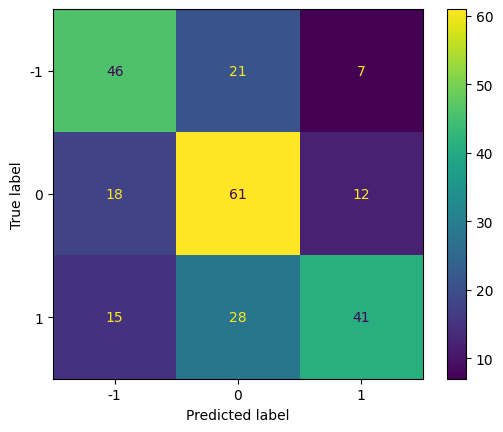

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

**Predict a new value**

In [ ]:
y_new=sv.predict(vectorizer.transform(['happy birthday red dead redemption that shit changed my life what a crazy experience']))
if y_new.item()==-1:
  print("negative")
elif y_new.item()==0:
  print("Neutral")
else:
  print("Positive")

Neutral
